# TESTING SCRIPT

In [275]:
import geopandas
import geoplot
import numpy as np
import pandas as pd
import random
import geojson
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import plotly.express as px
import tqdm
import seaborn as sns
import matplotlib as mpl
import geoplot.crs as gcrs
from bs4 import BeautifulSoup
import requests

In [253]:
# open datasets
london = geopandas.read_file('C:/Users/Zaca/Documents/Datasets/metro/london/london.shp').to_crs(epsg=4326)
paris = geopandas.read_file('C:/Users/Zaca/Documents/Datasets/metro/paris/hey/FRA_adm3.shp').to_crs(epsg=4326)
beijing = geopandas.read_file('C:/Users/Zaca/Documents/Datasets/metro/beijing/Beijing.shp').to_crs(epsg=4326)
barcelona = geopandas.read_file('C:/Users/Zaca/Documents/Datasets/metro/barcelona/bcn.shp').to_crs(epsg=4326)
moscow = geopandas.read_file('C:/Users/Zaca/Documents/Datasets/metro/moscow/RUS_adm2.shp').to_crs(epsg=4326)
madrid = geopandas.read_file('C:/Users/Zaca/Documents/Datasets/metro/madrid/ESP_adm/ESP_adm4.shp')

In [255]:
##barcelona2 = barcelona[barcelona['NAME_2'] == 'Barcelona']
#madrid2 = madrid[madrid['NAME_2'] == 'Madrid']
#paris2 = paris[paris['NAME_1'] == 'Ãle-de-France']
barcelona

,area,c_distri,n_distri,homes,dones,cartodb_id,perim,coord_x,coord_y,web_1,web_2,web_3,geometry
0,2.009280e+07,05,SarriÃÂ -Sant Gervasi,67799,80113,5,37563.642237,425388.507986,4.585170e+06,http://www.bcn.cat/sarria-santgervasi,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"MULTIPOLYGON (((2.07212 41.41270, 2.07050 41.4..."
1,1.194708e+07,07,Horta-GuinardÃÂ³,79017,89075,7,20413.187364,429117.618770,4.586950e+06,http://www.bcn.cat/horta-guinardo,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"POLYGON ((2.17616 41.42544, 2.17654 41.42500, ..."
2,4.368465e+06,01,Ciutat Vella,53968,48379,1,21035.207261,431616.773990,4.581564e+06,http://www.bcn.cat/ciutatvella,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"POLYGON ((2.18239 41.39143, 2.18346 41.39061, ..."
3,7.476392e+06,02,Eixample,123571,142906,2,13902.573980,430243.353657,4.582773e+06,http://www.bcn.cat/eixample,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"POLYGON ((2.18239 41.39143, 2.18135 41.39222, ..."
4,2.294042e+07,03,Sants-MontjuÃÂ¯c,87877,95243,3,47125.925905,428562.773279,4.578163e+06,http://www.bcn.cat/sants-montjuic,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"POLYGON ((2.16785 41.37498, 2.16856 41.37495, ..."
5,6.017532e+06,04,Les Corts,38331,43939,4,12481.472647,426369.646389,4.582295e+06,http://www.bcn.cat/lescorts,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"POLYGON ((2.10291 41.40109, 2.10295 41.40110, ..."
6,4.185517e+06,06,GrÃÂ cia,55611,65891,6,12280.060880,429253.013001,4.584840e+06,http://www.bcn.cat/gracia,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"POLYGON ((2.16865 41.40696, 2.16979 41.40608, ..."
7,8.041439e+06,08,Nou Barris,78448,87862,8,14698.411907,431185.040621,4.588829e+06,http://www.bcn.cat/noubarris,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"POLYGON ((2.18745 41.46213, 2.18744 41.46212, ..."
8,6.565322e+06,09,Sant Andreu,70151,77581,9,15132.450209,432697.846739,4.587572e+06,http://www.bcn.cat/santandreu,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"POLYGON ((2.20719 41.42756, 2.20558 41.42831, ..."
9,1.052376e+07,10,Sant MartÃÂ­,113572,122147,10,20736.527911,433330.835564,4.584520e+06,http://www.bcn.cat/santmarti,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,"POLYGON ((2.20719 41.42756, 2.20715 41.42747, ..."


In [252]:
metro_raw = pd.read_json('C:/Users/Zaca/Documents/Datasets/metro/madrid/madrid_subway.geojson')
metro = json_normalize(metro_raw['features'])
metro

madrid_stations = metro['geometry.coordinates']
#madrid_stations = [Point(x, y) for x, y in madrid_stations]
madrid_stations

0                [-3.666807, 40.480133]
1                [-3.676377, 40.476807]
2                [-3.698258, 40.460551]
3                [-3.703978, 40.446967]
4                [-3.704666, 40.412341]
                     ...               
320              [-3.695719, 40.427757]
321    [-3.7187859999999997, 40.420692]
322              [-3.718776, 40.420692]
323              [-3.682662, 40.474554]
324              [-3.718271, 40.324119]
Name: geometry.coordinates, Length: 325, dtype: object

In [262]:
barcelona_station = pd.read_csv('C:/Users/Zaca/Documents/Datasets/metro/barcelona/barcelona_subway.csv')

In [273]:
bcn_st = barcelona_station[barcelona_station.EQUIPAMENT.str.contains('METRO')]
#x = bcn_st['LATITUD']
#y = bcn_st['LONGITUD']
#stations = [Point(x, y) for x, y in list(zip(y,x))]
bcn_st['EQUIPAMENT'].unique()

array(["METRO (L3, L5) - VALL D'HEBRON (C. de les Basses d'Horta)-",
       "METRO (L11) - CASA DE L'AIGUA (C. Vila-Real)-",
       'METRO (L11) - CIUTAT MERIDIANA (C. Pedraforca)-',
       'METRO (L1) - CATALUNYA (Rda. Universitat)-',
       'METRO (L1) - CATALUNYA (Rambla de Catalunya)-',
       'METRO (L5) - SANT ILDEFONS-',
       'METRO (L2) - MONUMENTAL (C. de la Marina)-',
       'METRO (L1) - ROCAFORT (C. de Rocafort)-',
       'METRO (L2) - PASSEIG DE GRÀCIA (Pg. de Gràcia)-',
       'METRO (L1) - RAMBLA JUST OLIVERAS-',
       "METRO (L5) - HORTA (Pl. d'Eivissa)-",
       "METRO (L1) - MERCAT NOU (C. d'Antoni de Capmany)-",
       'METRO (L3) - TARRAGONA-', 'METRO (L3) - MUNDET (Can Marcet)-',
       'METRO (L4) - EL MARESME-FÒRUM (C. del Maresme)-',
       'METRO (L2) - UNIVERSITAT-',
       'METRO (L3) - MARIA CRISTINA (Pl. de la Reina Maria Cristina)-',
       'METRO (L2) - UNIVERSITAT (Rda. de Sant Antoni)-',
       'METRO (L4) - VIA JÚLIA (Via Júlia - Joaquim Valls)-',
 

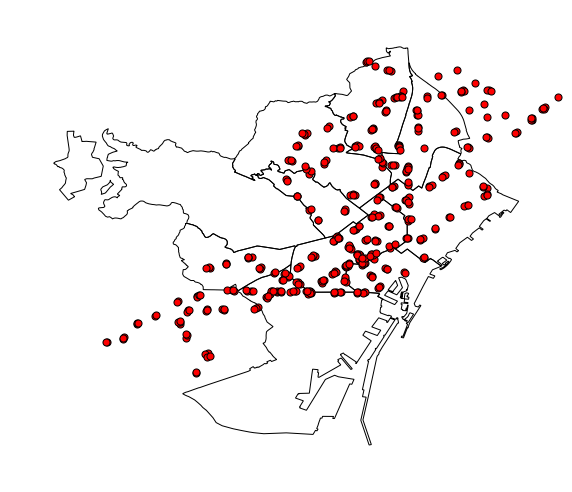

In [256]:
ax = geoplot.polyplot(barcelona, figsize=(10, 10), lw= 1);
for p in stations:  
    ax.scatter(p.x, p.y, facecolor='r', edgecolor='k', s=50);

In [181]:
moscow2 = moscow[moscow['NAME_1'] == 'Moscow City']

In [224]:
madrid2

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
232,215,ESP,Spain,8,Comunidad de Madrid,33,Madrid,233,n.a. (175),Comarca,Comarca,None,None,"POLYGON ((-3.53646 41.16038, -3.54047 41.15052..."
233,215,ESP,Spain,8,Comunidad de Madrid,33,Madrid,234,n.a. (176),Comarca,Comarca,None,None,"POLYGON ((-3.44673 40.76333, -3.44332 40.76082..."
234,215,ESP,Spain,8,Comunidad de Madrid,33,Madrid,235,n.a. (177),Comarca,Comarca,None,None,"POLYGON ((-3.73598 40.73222, -3.73270 40.73048..."
235,215,ESP,Spain,8,Comunidad de Madrid,33,Madrid,236,n.a. (178),Comarca,Comarca,None,None,"POLYGON ((-4.02514 40.57333, -4.00532 40.56162..."
236,215,ESP,Spain,8,Comunidad de Madrid,33,Madrid,237,n.a. (179),Comarca,Comarca,None,None,"MULTIPOLYGON (((-4.25646 40.66382, -4.25743 40..."
237,215,ESP,Spain,8,Comunidad de Madrid,33,Madrid,238,n.a. (180),Comarca,Comarca,None,None,"POLYGON ((-3.17776 40.31515, -3.18243 40.30675..."


In [279]:
def response_and_soup(url):
    
    """
    Turns links into soup.
    Input: URL to scrape
    Output: the soup from BeautifulSoup package
    """
    
    # get response
    response = requests.get(url)
    print('Response code:', response.status_code)
    
    # cook soup
    soup = BeautifulSoup(response.content, "html.parser")
    
    return soup

url = 'https://en.wikipedia.org/wiki/List_of_Moscow_Metro_stations'

soup = response_and_soup(url)

location_text = [t.text for t in soup.find_all('span', {'class':'geo-dec'})]

location_text = [s.replace('°', '').replace('N', '').replace('E', '').split(' ') for s in location_text]
latlong = []
for s in location_text:
    latlong += [[float(x) for x in s]]
    
latlong

Response code: 200


[[55.8148, 37.7342],
 [55.8038, 37.7448],
 [55.7963, 37.7151],
 [55.7888, 37.6802],
 [55.7801, 37.6673],
 [55.7753, 37.6562],
 [55.769, 37.6487],
 [55.7657, 37.6388],
 [55.7597, 37.6272],
 [55.7577, 37.6166],
 [55.7512, 37.61],
 [55.7453, 37.6037],
 [55.7356, 37.5943],
 [55.7267, 37.5786],
 [55.7233, 37.5639],
 [55.7103, 37.5592],
 [55.6926, 37.5333],
 [55.6771, 37.506],
 [55.6637, 37.4833],
 [55.6459, 37.4725],
 [55.633, 37.4419],
 [55.6227, 37.424],
 [55.8791, 37.4822],
 [55.8658, 37.4764],
 [55.8549, 37.4761],
 [55.8398, 37.4867],
 [55.819, 37.498],
 [55.8051, 37.5153],
 [55.8003, 37.5329],
 [55.7897, 37.558],
 [55.7767, 37.5835],
 [55.7701, 37.5958],
 [55.7647, 37.6065],
 [55.7578, 37.619],
 [55.7415, 37.6295],
 [55.7305, 37.6377],
 [55.7074, 37.6576],
 [55.695, 37.6641],
 [55.6785, 37.6638],
 [55.6551, 37.6487],
 [55.6358, 37.6564],
 [55.6214, 37.6694],
 [55.6132, 37.6949],
 [55.6108, 37.7186],
 [55.6137, 37.7444],
 [55.6326, 37.766],
 [55.8563, 37.3544],
 [55.8457, 37.3622],
 [55

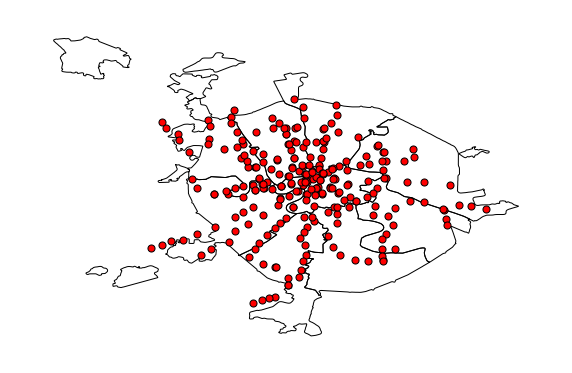

In [280]:
moscow = geopandas.read_file('C:/Users/Zaca/Documents/Datasets/metro/moscow/RUS_adm2.shp').to_crs(epsg=4326)
moscow2 = moscow[moscow['NAME_1'] == 'Moscow City']



stations = [Point(x, y) for x, y in latlong]

ax = geoplot.polyplot(moscow2, figsize=(10, 10), lw= 1);
for p in stations:  
    ax.scatter(p.x, p.y, facecolor='r', edgecolor='k', s=50);
    

In [282]:
def swap_xy(geom):
    
    if geom.is_empty:
        return geom

    if geom.has_z:
        def swap_xy_coords(coords):
            for x, y, z in coords:
                yield (y, x, z)
    else:
        def swap_xy_coords(coords):
            for x, y in coords:
                yield (y, x)

    # Process coordinates from each supported geometry type
    if geom.type in ('Point', 'LineString', 'LinearRing'):
        return type(geom)(list(swap_xy_coords(geom.coords)))
    elif geom.type == 'Polygon':
        ring = geom.exterior
        shell = type(ring)(list(swap_xy_coords(ring.coords)))
        holes = list(geom.interiors)
        for pos, ring in enumerate(holes):
            holes[pos] = type(ring)(list(swap_xy_coords(ring.coords)))
        return type(geom)(shell, holes)
    elif geom.type.startswith('Multi') or geom.type == 'GeometryCollection':
        # Recursive call
        return type(geom)([swap_xy(part) for part in geom.geoms])
    else:
        raise ValueError('Type %r not recognized' % geom.type)

In [285]:
moscow2['geometry'] = [poly for poly in moscow2['geometry']]


C:\Users\Zaca\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [286]:
moscow2

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
1114,188,RUS,Russia,43,Moscow City,1115,Central,Okrug,None,None,Central Administrative Okrug,"POLYGON ((37.67955398559576 55.77857208251948,..."
1115,188,RUS,Russia,43,Moscow City,1116,Eastern,Okrug,None,None,Eastern Administrative Okrug,(POLYGON ((37.90807723999046 55.80827713012695...
1116,188,RUS,Russia,43,Moscow City,1117,North-Eastern,Okrug,None,None,North-Eastern Administrative Okrug,"POLYGON ((37.61025619506853 55.94179153442383,..."
1117,188,RUS,Russia,43,Moscow City,1118,North-Western,Okrug,None,Ð¥Ð¸Ð¼ÐºÐ¸,North-Western Administrative Okrug,"POLYGON ((37.41606903076195 55.89843750000006,..."
1118,188,RUS,Russia,43,Moscow City,1119,Northern,Okrug,None,None,Northern Administrative Okrug,"(POLYGON ((37.59953689575207 55.8759651184082,..."
1119,188,RUS,Russia,43,Moscow City,1120,South-Eastern,Okrug,None,None,South-Eastern Administrative Okrug,"POLYGON ((37.74886322021484 55.75914382934576,..."
1120,188,RUS,Russia,43,Moscow City,1121,South-Western,Okrug,None,None,South-Western Administrative Okrug,"POLYGON ((37.642143249512 55.66911315917969, 3..."
1121,188,RUS,Russia,43,Moscow City,1122,Southern,Okrug,None,None,Southern Administrative Okrug,"POLYGON ((37.68414306640619 55.71376037597656,..."
1122,188,RUS,Russia,43,Moscow City,1123,Western,Okrug,None,None,Western Administrative Okrug,(POLYGON ((37.24789428710966 55.58891296386724...
1123,188,RUS,Russia,43,Moscow City,1124,Zelenogradsky,Okrug,None,None,Zelenogradsky Administrative Okrug,"POLYGON ((37.23519897460938 56.00275421142578,..."


In [292]:
from pykml import parser
from os import path

kml_file = 'C:/Users/Zaca/Documents/Datasets/metro/london/stations.kml'

with open(kml_file) as f:
    doc = parser.parse(f)

print(doc)

In [293]:
soup = BeautifulSoup(kml_file, "html.parser")

C:\Users\Zaca\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning:

"b'C:/Users/Zaca/Documents/Datasets/metro/london/stations.kml'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.



In [302]:
with open(kml_file) as f:
    soup = BeautifulSoup(f, "xml")

In [334]:
coordinates = [t.text for t in soup.find_all('coordinates')]
coordinates[1]

'\n\t\t\t\t\t-.075614184477749600,51.514271823083390000,0\n\t\t\t\t'

In [345]:
stations = [s.replace('\n', '').replace('\t', '').replace(',0', '').split(',') for s in coordinates]

station_float = []
for station in stations:
    station_float += [[float(x) for x in station]]
    
underground = [Point(x, y) for x, y in station_float]

In [346]:
london = geopandas.read_file('C:/Users/Zaca/Documents/Datasets/metro/london/london.shp').to_crs(epsg=4326)
london = london[london['Designated'] == 'Outer']

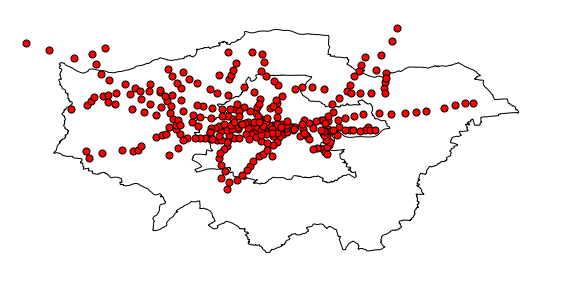

In [348]:
ax = geoplot.polyplot(london, figsize=(10, 10), lw= 1);
for p in underground:  
    ax.scatter(p.x, p.y, facecolor='r', edgecolor='k', s=50);

In [317]:
london = london_unary

,Designated,Source,Shape_Leng,Shape_Area,geometry
1,Outer,The London Plan consolidated with alterations ...,386483.894147,1.266756e+09,"POLYGON ((0.21031 51.48588, 0.21106 51.48587, ..."


In [349]:
nyc = geopandas.read_file('C:/Users/Zaca/Documents/Datasets/metro/nyc/TabDATA/NYC_Nhood ACS2008_12.shp').to_crs(epsg=4326)

In [353]:
nyc.columns

Index(['UEMPRATE', 'cartodb_id', 'borocode', 'withssi', 'withsocial',
       'withpubass', 'struggling', 'profession', 'popunemplo', 'poptot',
       'popover18', 'popinlabou', 'poororstru', 'poor', 'pacificune',
       'pacificinl', 'pacific', 'otherunemp', 'otherinlab', 'otherethni',
       'onlyprofes', 'onlymaster', 'onlylessth', 'onlyhighsc', 'onlydoctor',
       'onlycolleg', 'onlybachel', 'okay', 'mixedunemp', 'mixedinlab', 'mixed',
       'master', 'maleunempl', 'maleover18', 'male_pro', 'male_mastr',
       'male_lesHS', 'male_HS', 'male_doctr', 'male_collg', 'male_BA',
       'maleinlabo', 'maledrop', 'male16to19', 'male', 'lessthan10',
       'lessthanhi', 'households', 'hispanicun', 'hispanicin', 'hispanic',
       'highschool', 'field_1', 'femaleunem', 'femaleover', 'fem_profes',
       'fem_master', 'fem_lessHS', 'fem_HS', 'fem_doctor', 'fem_colleg',
       'fem_BA', 'femaleinla', 'femaledrop', 'femal16_19', 'female',
       'europeanun', 'europeanin', 'european', 'doctor